In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit


In [17]:
df06=pd.read_csv("i0.6.csv")
df06['Id']=0.6
df09=pd.read_csv("i0.9.csv")
df09['Id']=0.9
df102=pd.read_csv("i1.2.csv")
df102['Id']=1.2
df105=pd.read_csv("i1.5.csv")
df105['Id']=1.5
df201=pd.read_csv("i2.1.csv")
df201['Id']=2.1
df204=pd.read_csv("i2.4.csv")
df204['Id']=2.4
df207=pd.read_csv("i2.7.csv")
df207['Id']=2.7
df3=pd.read_csv("i3.csv")
df3['Id']=3
df=df06.append(df09).append(df102).append(df105).append(df201).append(df204).append(df207).append(df3)
df

C:\Users\sayan\AppData\Local\Temp\ipykernel_26608\198095417.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df06.append(df09).append(df102).append(df105).append(df201).append(df204).append(df207).append(df3)
C:\Users\sayan\AppData\Local\Temp\ipykernel_26608\198095417.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df06.append(df09).append(df102).append(df105).append(df201).append(df204).append(df207).append(df3)
C:\Users\sayan\AppData\Local\Temp\ipykernel_26608\198095417.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df06.append(df09).append(df102).append(df105).append(df201).append(df204).append(df207).append(df3)
C:\Users\sayan\AppData\Local\Temp\ipykernel_26608\198095417.py:17: FutureWarning: The

,SOC,Ri,Id
0,0.366468,0.211125,0.6
1,0.594305,0.211086,0.6
2,4.239699,0.201915,0.6
3,4.543482,0.201364,0.6
4,4.695373,0.201010,0.6
...,...,...,...
161,98.262747,0.217383,3.0
162,98.490287,0.217757,3.0
163,99.400449,0.219017,3.0
164,99.324602,0.218879,3.0


In [192]:
df.describe()


,SOC,Ri,Id
count,2446.000000,2446.000000,2446.000000
mean,45.767969,0.198792,1.491783
std,34.024363,0.007444,0.723772
min,0.290522,0.189360,0.600000
25%,10.477430,0.192430,0.900000
50%,43.578383,0.196966,1.200000
75%,78.647503,0.203426,2.100000
max,100.083179,0.223799,3.000000


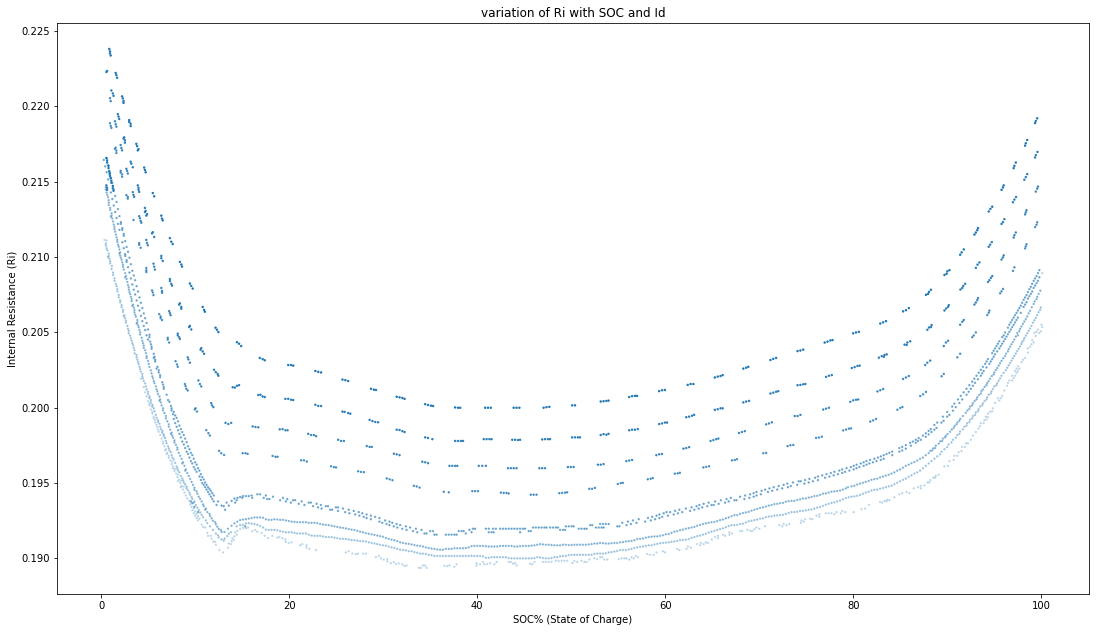

In [186]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(df['SOC'],df[' Ri'],alpha =df['Id']/3,s=2)
plt.xlabel("SOC% (State of Charge)")
plt.ylabel("Internal Resistance (Ri)")
plt.title("variation of Ri with SOC and Id")
plt.show()

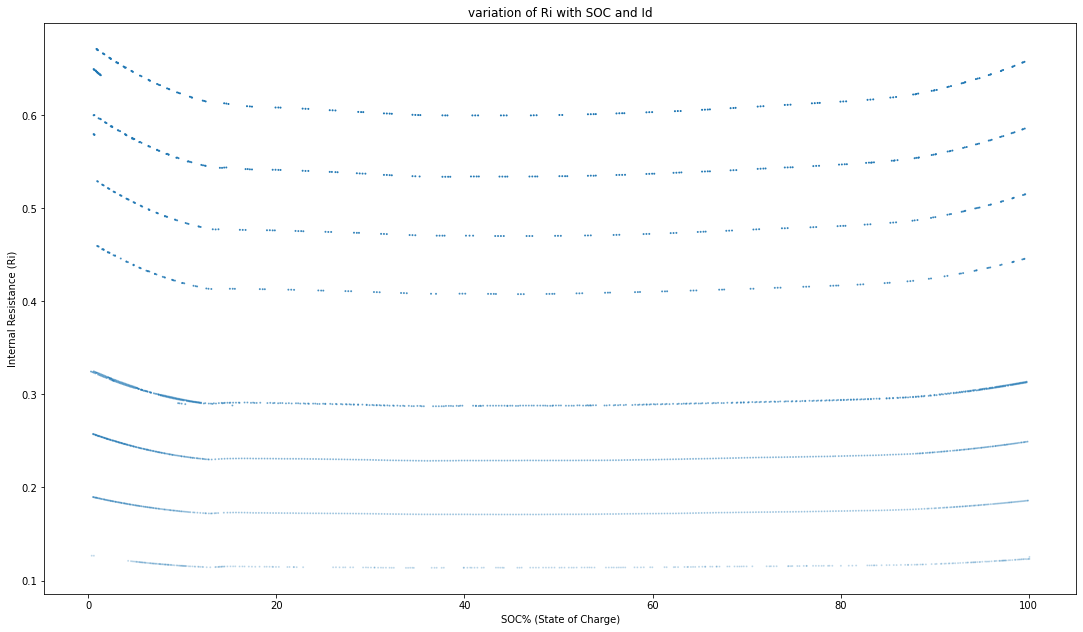

In [188]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(df['SOC'],df[' Ri']*df['Id'],alpha =df['Id']/3,s=1)
plt.xlabel("SOC% (State of Charge)")
plt.ylabel("Internal Resistance (Ri)")
plt.title("variation of Ri with SOC and Id")
plt.show()

In [88]:
model = np.poly1d(np.polyfit(df3['SOC'],
                             df3[' Ri'], 2))

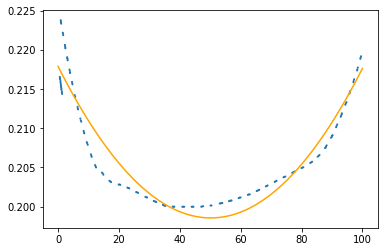

In [107]:
polyline = np.linspace(0, 100, 100)
plt.scatter(df3['SOC'], df3[' Ri'],alpha =df3['Id']/3,s=1)
plt.plot(polyline, model(polyline),color='orange')
plt.show()
  

In [141]:
def objective(x, a, b, c,m1,b1,m2,b2):
#     return a*x*x+b*x+c
    x,y=x
    return (x<10)* (m1*x+b1)+(x>90)*(m2*x+b2)+np.logical_and(x>=10,x<=90)*(a*x*x+b*x+c)

In [190]:
popt, _ = curve_fit(objective,df3['SOC'], df3[' Ri'])
a, b, c,m1,b1,m2,b2=popt

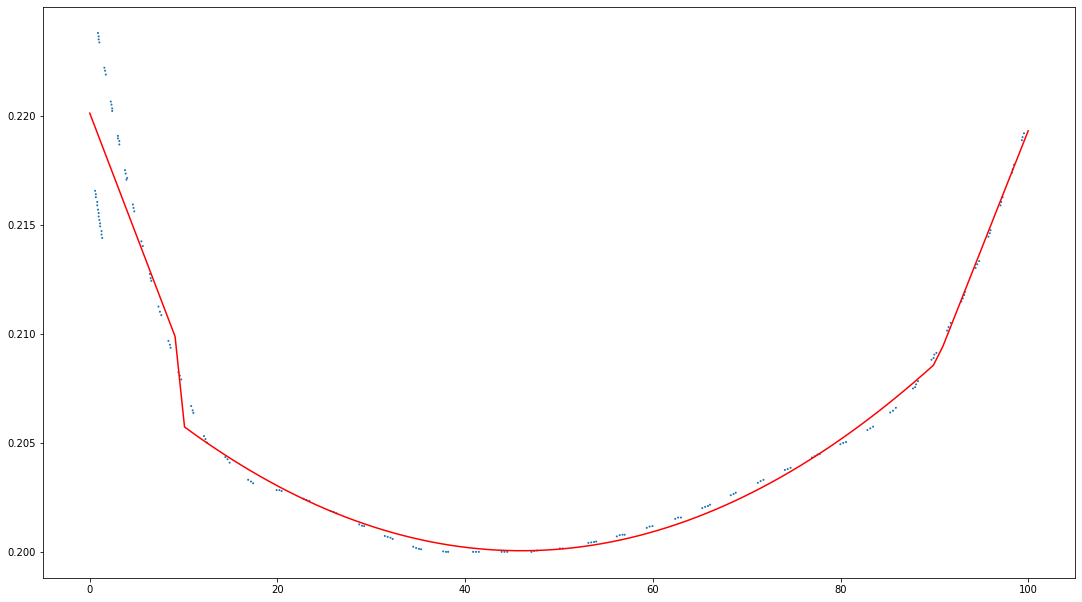

In [191]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.scatter(df3['SOC'], df3[' Ri'],alpha =df3['Id']/3,s=1)

plt.plot(polyline, objective(polyline,a, b, c,m1,b1,m2,b2),color='red')
plt.show()

In [156]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [166]:
X = df[['SOC','Id']].values
y = df[' Ri'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(1712, 2)
(734, 2)


In [167]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [168]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

0.0035675782500332316
0.7739652132996323
0.0036101261418314055
0.7553329713857376


In [183]:
model_rf = RandomForestRegressor(n_estimators=20, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.0003538691400534192
0.9977761082264364
0.0005115668802814042
0.9950871270477036
